<a href="https://colab.research.google.com/github/shehabKhamis/SpeechEmotionRecognition/blob/main/SpeechRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Download the Dataset and Understand the Format**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install librosa

In [ ]:
import numpy as np
import wave, os, glob
from scipy.io import wavfile
import soundfile as sf
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.python.keras.callbacks import  ReduceLROnPlateau

In [ ]:
def wavPlot(s):
  data, sampling_rate = librosa.load(s)
  plt.figure(figsize=(15, 5))
  librosa.display.waveplot(data, sr=sampling_rate)
  
  

**2. Create the Feature Space**

**Zero crossing rate**

In [ ]:
def ExtractFeatures(data,fs):
  Features=np.array([])
 
  zcr=np.mean(librosa.feature.zero_crossing_rate(np.array(data)),axis=0)
  Features=np.hstack((Features,zcr))

  return  Features;






**Convert the audio waveform to mel spectrogram and use this as the feature space.**

In [ ]:
def melspecFeatures(data,fs):
   melspec=np.array([])
   mel=librosa.feature.melspectrogram(data, fs)
   mel=mel.flatten()
   print(mel.shape)
   melspec=np.hstack((melspec,mel))
   
   return mel;


**Data Augmentation Functions**

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

**Reading data and extract features from it**

In [ ]:
Datafr=pd.DataFrame(columns=['feature'])
Data=pd.DataFrame(columns=['feature'])
SampleRates=[]
emotion=[]
label=[]
label2d=[]
i=0
c=0
column_names = ["Data", "Label"]     
pathAudio = ""
path = "/content/drive/MyDrive/Crema/"
files = os.listdir(path)
for filename in sorted(glob.glob(os.path.join(path, '*.wav'))):
  data, fs = sf.read(filename, dtype='float32')
  emotion=filename.split("_")
  label.append(emotion[2])
  label.append(emotion[2])
  label.append(emotion[2])
  label.append(emotion[2])
  label2d.append(emotion[2])     
  print(c)  
  Datafr.loc[i]=[ExtractFeatures(data,fs)]
  Data.loc[c]=[melspecFeatures(data,fs)]
  # Data Augmentation      
  #adding noise 
  i+=1
  noise_data = noise(data)
  Datafr.loc[i]=[ExtractFeatures(noise_data,fs)]
  i+=1  
  ## adding shift
  shift_data = shift(data)
  Datafr.loc[i]=[ExtractFeatures(shift_data,fs)]
  i+=1 
  ##stretching 
  new_data = stretch(data)
  data_stretch_pitch = pitch(new_data, fs)
  Datafr.loc[i]=[ExtractFeatures(data_stretch_pitch,fs)]
  i+=1
  c+=1
  
  SampleRates.append(fs)

Streaming output truncated to the last 5000 lines.
4942
(11648,)
4943
(13696,)
4944
(9344,)
4945
(9216,)
4946
(9088,)
4947
(9216,)
4948
(8832,)
4949
(10496,)
4950
(8832,)
4951
(9856,)
4952
(10624,)
4953
(15488,)
4954
(17152,)
4955
(12416,)
4956
(9600,)
4957
(11008,)
4958
(11264,)
4959
(8704,)
4960
(11776,)
4961
(11648,)
4962
(10112,)
4963
(12288,)
4964
(10240,)
4965
(11264,)
4966
(14592,)
4967
(11904,)
4968
(11904,)
4969
(9856,)
4970
(12672,)
4971
(9344,)
4972
(10112,)
4973
(10240,)
4974
(8576,)
4975
(8832,)
4976
(9984,)
4977
(10112,)
4978
(11264,)
4979
(9856,)
4980
(9600,)
4981
(10112,)
4982
(9088,)
4983
(6912,)
4984
(8576,)
4985
(10368,)
4986
(6016,)
4987
(8192,)
4988
(8320,)
4989
(9600,)
4990
(8448,)
4991
(8320,)
4992
(8832,)
4993
(7296,)
4994
(8192,)
4995
(7808,)
4996
(8320,)
4997
(10112,)
4998
(8192,)
4999
(7936,)
5000
(8704,)
5001
(8576,)
5002
(8704,)
5003
(8320,)
5004
(9216,)
5005
(7296,)
5006
(8320,)
5007
(8576,)
5008
(7168,)
5009
(8448,)
5010
(7296,)
5011
(11136,)
5012
(11648,

**Zero crossing Dataframe**

In [ ]:

Datafr=pd.DataFrame(Datafr, columns=['feature'])


In [ ]:
Datafr=pd.DataFrame(Datafr['feature'].values.tolist())
#Replacing Nan values with zeros
Datafr=Datafr.fillna(0)
#Add Labels to the data
Datafr['label']= label
Datafr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,label
0,0.048340,0.057129,0.067383,0.053223,0.036133,0.035156,0.033203,0.034180,0.038574,0.039062,0.040039,0.058105,0.089844,0.124512,0.137207,0.126953,0.094727,0.064453,0.064453,0.091309,0.147949,0.166016,0.175293,0.149902,0.101074,0.108398,0.112793,0.123535,0.130859,0.122559,0.115234,0.104004,0.084961,0.121094,0.210938,0.268555,0.288086,0.258301,0.182129,0.147949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
1,0.196777,0.283203,0.355469,0.322754,0.317383,0.289551,0.285156,0.253418,0.257324,0.268555,0.262695,0.278809,0.248047,0.220215,0.183105,0.129395,0.097656,0.070312,0.080078,0.107910,0.167480,0.190430,0.187012,0.160645,0.109863,0.109375,0.111816,0.123535,0.127930,0.120605,0.118652,0.108887,0.096680,0.141602,0.229980,0.286133,0.299805,0.259277,0.181152,0.145020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
2,0.021484,0.030762,0.037598,0.038574,0.039551,0.037109,0.077148,0.072754,0.072754,0.074219,0.036133,0.035156,0.033203,0.032715,0.035156,0.039062,0.040039,0.039062,0.086426,0.119141,0.132812,0.145996,0.101074,0.068848,0.061523,0.085938,0.135742,0.163574,0.178223,0.154785,0.106445,0.105957,0.111328,0.121582,0.132812,0.119629,0.114258,0.107422,0.090332,0.110840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
3,0.018066,0.026367,0.038574,0.037598,0.037109,0.039062,0.032715,0.032227,0.030273,0.028320,0.043457,0.063965,0.099121,0.146484,0.181152,0.190430,0.180176,0.162598,0.136230,0.124023,0.115234,0.099121,0.084961,0.070801,0.082520,0.097168,0.116699,0.131348,0.129883,0.133789,0.134766,0.147461,0.153320,0.150879,0.158203,0.165039,0.166016,0.163086,0.158691,0.142090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
4,0.019531,0.031250,0.038086,0.040527,0.038086,0.040527,0.043945,0.043457,0.044434,0.043945,0.048828,0.051270,0.048828,0.044922,0.041016,0.054199,0.088379,0.110352,0.126465,0.126465,0.097168,0.099609,0.151855,0.152344,0.161621,0.141602,0.093750,0.086914,0.084473,0.093750,0.083496,0.076660,0.070312,0.123047,0.229980,0.277832,0.299316,0.255859,0.166992,0.151855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29763,0.012695,0.020020,0.034180,0.037109,0.037109,0.037109,0.032227,0.031738,0.029785,0.030273,0.028809,0.030273,0.042969,0.042480,0.045410,0.047852,0.044922,0.047363,0.047363,0.047363,0.047363,0.049805,0.072754,0.093262,0.163086,0.256836,0.366699,0.487305,0.526855,0.486816,0.380371,0.264160,0.165039,0.133301,0.128418,0.125488,0.133789,0.126465,0.124512,0.112793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEU
29764,0.015625,0.020996,0.027344,0.027832,0.024902,0.029785,0.033203,0.046387,0.064453,0.062988,0.062012,0.052246,0.036621,0.035645,0.062012,0.172363,0.323730,0.494629,0.615723,0.541992,0.439941,0.285645,0.150391,0.129883,0.093750,0.08

**Melspectrogram Datafram**

In [ ]:
Data=pd.DataFrame(Data['feature'].values.tolist())
#Replacing Nan values with zeros
Data=Data.fillna(0)
#Add Labels to the data
Data['label']= label2d
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,20057,20058,20059,20060,20061,20062,20063,20064,20065,20066,20067,20068,20069,20070,20071,20072,20073,20074,20075,20076,20077,20078,20079,20080,20081,20082,20083,20084,20085,20086,20087,20088,20089,20090,20091,20092,20093,20094,20095,label
0,0.000044,0.000266,0.000579,0.000672,0.000944,0.000397,0.000283,0.000288,0.000517,0.000265,0.000061,0.000180,0.000538,0.006888,0.026408,0.010471,0.000970,0.000288,0.000443,0.001602,0.002689,0.000915,0.000244,0.000513,0.000176,0.000212,0.002235,0.011373,0.013496,0.005037,0.009904,0.008716,0.001468,0.007882,0.010395,0.003339,0.001380,0.001300,0.006562,0.016527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANG
1,0.003241,0.002799,0.001573,0.001265,0.000945,0.001005,0.001031,0.001009,0.000784,0.001684,0.001614,0.000720,0.000504,0.002346,0.003634,0.000878,0.001448,0.002500,0.002972,0.000847,0.000245,0.000445,0.000866,0.000689,0.000266,0.001027,0.018258,0.020130,0.004143,0.000701,0.000214,0.000184,0.000100,0.000459,0.001056,0.001726,0.001792,0.000620,0.000213,0.000133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
2,0.003268,0.000876,0.000314,0.000847,0.000580,0.000868,0.000768,0.000179,0.000160,0.000442,0.000930,0.001172,0.000483,0.000275,0.000220,0.001109,0.001495,0.000766,0.013808,0.030096,0.007107,0.000897,0.000527,0.000688,0.000548,0.000395,0.002156,0.001747,0.000591,0.000362,0.000494,0.003537,0.008501,0.008476,0.005833,0.004148,0.002699,0.009852,0.008252,0.000697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FEA
3,0.003169,0.000811,0.000257,0.000997,0.000796,0.000576,0.001919,0.002474,0.000681,0.000502,0.002804,0.010949,0.026095,0.005904,0.003008,0.003266,0.000300,0.000422,0.001370,0.004462,0.021532,0.011920,0.003843,0.005982,0.001683,0.004146,0.023188,0.016683,0.002435,0.001526,0.000625,0.000326,0.000200,0.000692,0.000839,0.000469,0.000031,0.000134,0.001199,0.000964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HAP
4,0.003319,0.001745,0.001170,0.003235,0.003108,0.001679,0.001819,0.000850,0.001578,0.002936,0.001904,0.003183,0.001902,0.001448,0.001522,0.001068,0.000270,0.000087,0.000968,0.001957,0.000890,0.000257,0.002935,0.008083,0.004607,0.004500,0.002439,0.001849,0.000969,0.002521,0.003129,0.000930,0.001414,0.001540,0.000507,0.000533,0.000861,0.000332,0.000725,0.001497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NEU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,0.000535,0.000719,0.001832,0.010175,0.006644,0.005718,0.005571,0.005830,0.002890,0.001842,0.014981,0.020609,0.007463,0.003546,0.010216,0.007203,0.002652,0.006595,0.014820,0.008443,0.003462,0.004395,0.004236,0.008793,0.013969,0.007182,0.001653,0.005819,0.007659,0.003305,0.004812,0.006633,0.008600,0.001865,0.005858,0.011984,0.012341,0.003397,0.006426,0.008382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DIS
7438,0.007570,0.004233,0.005494,0.003845,0.003014,0.002855,0.003373,0.002128,0.004198,0.005393,0.013333,0.008350,0.003428,0.007985,0.004278,0.007041,0.005603,

In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_SAD_XX.wav")



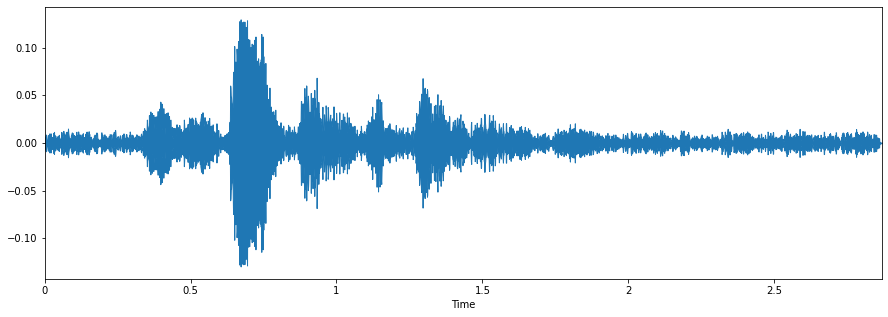

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_SAD_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_DIS_XX.wav")

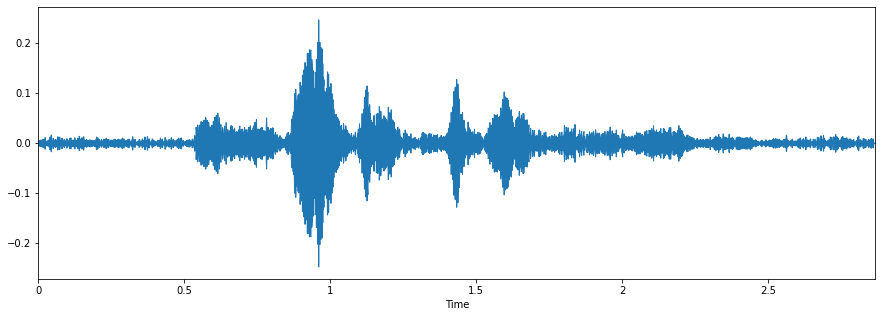

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_DIS_XX.wav")

In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_NEU_XX.wav")

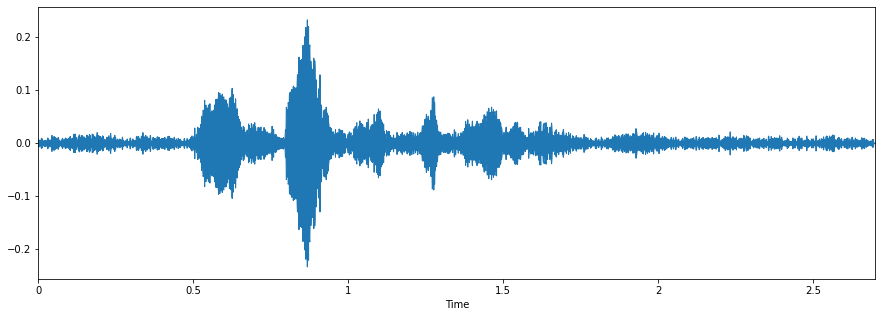

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_NEU_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_ANG_XX.wav")

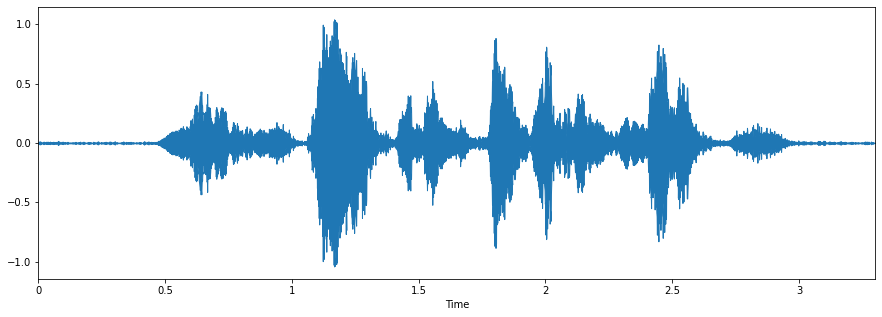

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_ANG_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_FEA_XX.wav")

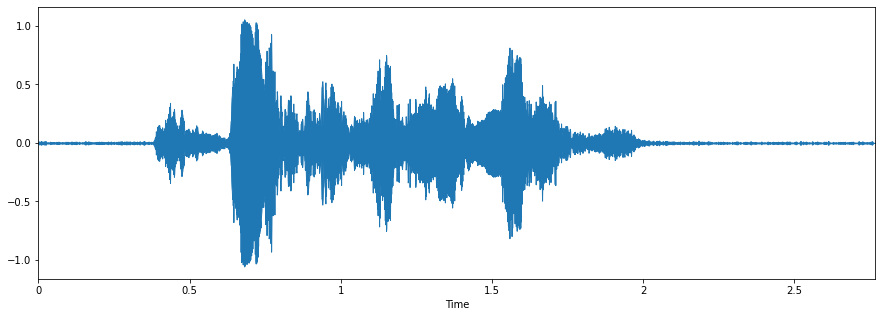

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_FEA_XX.wav")


In [ ]:
ipd.Audio("/content/drive/MyDrive/Crema/1009_WSI_HAP_XX.wav")

In [ ]:
wavPlot("/content/drive/MyDrive/Crema/1009_WSI_HAP_XX.wav")

**3. Building the Model**

**a. Split the data into 70% training and validation and 30% testing.**

In [ ]:
X1 = Datafr.iloc[: ,:-1].values
Y1 = Datafr['label'].values

In [ ]:
X2 = Data.iloc[: ,:-1].values
Y2 = Data['label'].values

In [ ]:
encoder = OneHotEncoder()
Y1 = encoder.fit_transform(np.array(Y1).reshape(-1,1)).toarray()

In [ ]:
encoder = OneHotEncoder()
Y2 = encoder.fit_transform(np.array(Y2).reshape(-1,1)).toarray()

In [ ]:
x_train_valid1, x_test1, y_train_valid1, y_test1 = train_test_split(X1, Y1, random_state=0, shuffle=True,test_size=0.3)
x_train_valid1.shape, y_train_valid1.shape, x_test1.shape, y_test1.shape

((20837, 196), (20837, 6), (8931, 196), (8931, 6))

In [ ]:
x_train_valid2, x_test2, y_train_valid2, y_test2 = train_test_split(X2, Y2, random_state=0, shuffle=True,test_size=0.3)
x_train_valid2.shape, y_train_valid2.shape, x_test2.shape, y_test2.shape

((5209, 20096), (5209, 6), (2233, 20096), (2233, 6))

**b. Use 5% of the training and validation data for validation.**

In [ ]:
x_train1,x_valid1,y_train1,y_valid1=train_test_split(x_train_valid1,y_train_valid1,test_size=0.05)
x_train1.shape, y_train1.shape, x_valid1.shape, y_valid1.shape

((19795, 196), (19795, 6), (1042, 196), (1042, 6))

In [ ]:
x_train2,x_valid2,y_train2,y_valid2=train_test_split(x_train_valid2,y_train_valid2,test_size=0.05)
x_train2.shape, y_train2.shape, x_valid2.shape, y_valid2.shape

((4948, 20096), (4948, 6), (261, 20096), (261, 6))

**3. Building the Model**

In [ ]:
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train1)
x_valid1 = scaler.transform(x_valid1)
x_test1 = scaler.transform(x_test1)
x_train1.shape, y_train1.shape, x_valid1.shape, y_valid1.shape

((19795, 196), (19795, 6), (1042, 196), (1042, 6))

In [ ]:
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train2)
x_valid2 = scaler.transform(x_valid2)
x_test2 = scaler.transform(x_test2)
x_train2.shape, y_train2.shape, x_valid2.shape, y_valid2.shape

((4948, 20096), (4948, 6), (261, 20096), (261, 6))

**Model 1**

In [ ]:
x_train1 = np.expand_dims(x_train1, axis=2)
x_valid1 = np.expand_dims(x_valid1, axis=2)
x_test1 = np.expand_dims(x_test1, axis=2)
x_train1.shape, y_train1.shape, x_valid1.shape, y_valid1.shape

((19795, 196, 1), (19795, 6), (1042, 196, 1), (1042, 6))

In [ ]:
model1=Sequential()
model1.add(Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train1.shape[1], 1)))

model1.add(Conv1D(64, kernel_size=3, strides=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model1.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))


model1.add(Conv1D(16, kernel_size=3, strides=1, padding='same'))
model1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model1.add(Flatten())
model1.add(Dense(units=8, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(Dense(units=6, activation='softmax'))
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 196, 64)           256       
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 66, 64)            12352     
_________________________________________________________________
max_pooling1d_82 (MaxPooling (None, 33, 64)            0         
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 33, 32)            6176      
_________________________________________________________________
max_pooling1d_83 (MaxPooling (None, 17, 32)            0         
_________________________________________________________________
conv1d_99 (Conv1D)           (None, 17, 16)            1552      
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 9, 16)           

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history1=model1.fit(x_train1, y_train1, batch_size=64, epochs=50, validation_data=(x_valid1, y_valid1), callbacks=[rlrp])

Epoch 1/50
310/310 [==============================] - 12s 33ms/step - loss: 2.0283 - accuracy: 0.2290 - val_loss: 1.6981 - val_accuracy: 0.3129
Epoch 2/50
310/310 [==============================] - 10s 32ms/step - loss: 1.6841 - accuracy: 0.3206 - val_loss: 1.6490 - val_accuracy: 0.3215
Epoch 3/50
310/310 [==============================] - 10s 32ms/step - loss: 1.6527 - accuracy: 0.3269 - val_loss: 1.6350 - val_accuracy: 0.3359
Epoch 4/50
310/310 [==============================] - 9s 31ms/step - loss: 1.6308 - accuracy: 0.3366 - val_loss: 1.6106 - val_accuracy: 0.3474
Epoch 5/50
310/310 [==============================] - 10s 31ms/step - loss: 1.6122 - accuracy: 0.3482 - val_loss: 1.6138 - val_accuracy: 0.3330
Epoch 6/50
310/310 [==============================] - 10s 31ms/step - loss: 1.5947 - accuracy: 0.3563 - val_loss: 1.5965 - val_accuracy: 0.3551
Epoch 7/50
310/310 [==============================] - 10s 31ms/step - loss: 1.5872 - accuracy: 0.3616 - val_loss: 1.5952 - val_accuracy: 

33/33 [==============================] - 0s 6ms/step - loss: 1.5627 - accuracy: 0.3887
Accuracy of model 1 on valid data :  38.867563009262085 %


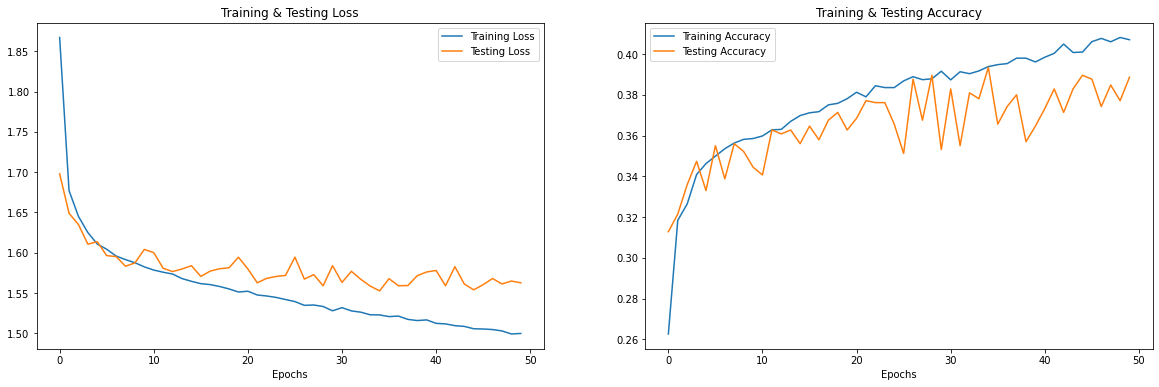

In [ ]:
print("Accuracy of model 1 on valid data : " , model1.evaluate(x_valid1,y_valid1)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
test_acc = history1.history['val_accuracy']
test_loss = history1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model1.predict(x_test1)
y_pred = encoder.inverse_transform(pred_test)

y_test11 = encoder.inverse_transform(y_test1)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test11.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,HAP,HAP
1,SAD,SAD
2,DIS,HAP
3,FEA,ANG
4,HAP,ANG
5,HAP,ANG
6,DIS,FEA
7,ANG,ANG
8,FEA,NEU
9,SAD,ANG


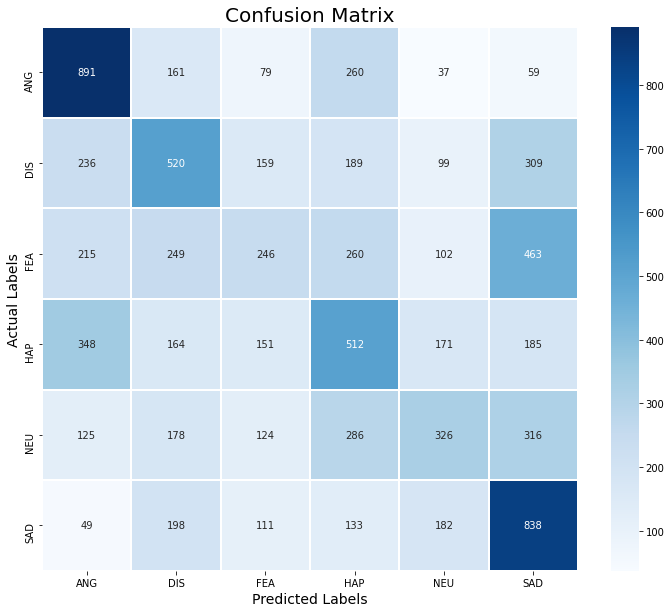

In [ ]:
cm = confusion_matrix(y_test11, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test11, y_pred))

              precision    recall  f1-score   support

         ANG       0.48      0.60      0.53      1487
         DIS       0.35      0.34      0.35      1512
         FEA       0.28      0.16      0.20      1535
         HAP       0.31      0.33      0.32      1531
         NEU       0.36      0.24      0.29      1355
         SAD       0.39      0.55      0.46      1511

    accuracy                           0.37      8931
   macro avg       0.36      0.37      0.36      8931
weighted avg       0.36      0.37      0.36      8931



In [ ]:
model1=Sequential()
model1.add(Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train1.shape[1], 1)))

model1.add(Conv1D(64, kernel_size=3, strides=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model1.add(Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model1.add(Conv1D(64, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))

model1.add(Flatten())
model1.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model1.add(Dense(units=6, activation='softmax'))
model1.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_104 (Conv1D)          (None, 196, 256)          1024      
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 66, 64)            49216     
_________________________________________________________________
max_pooling1d_88 (MaxPooling (None, 33, 64)            0         
_________________________________________________________________
conv1d_106 (Conv1D)          (None, 33, 128)           24704     
_________________________________________________________________
max_pooling1d_89 (MaxPooling (None, 17, 128)           0         
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 17, 64)            24640     
_________________________________________________________________
max_pooling1d_90 (MaxPooling (None, 9, 64)           

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history1=model1.fit(x_train1, y_train1, batch_size=64, epochs=50, validation_data=(x_valid1, y_valid1), callbacks=[rlrp])

Epoch 1/50
310/310 [==============================] - 28s 86ms/step - loss: 2.5033 - accuracy: 0.2652 - val_loss: 1.6832 - val_accuracy: 0.3033
Epoch 2/50
310/310 [==============================] - 26s 83ms/step - loss: 1.6922 - accuracy: 0.3084 - val_loss: 1.6397 - val_accuracy: 0.3369
Epoch 3/50
310/310 [==============================] - 27s 87ms/step - loss: 1.6610 - accuracy: 0.3206 - val_loss: 1.6359 - val_accuracy: 0.3301
Epoch 4/50
310/310 [==============================] - 27s 87ms/step - loss: 1.6384 - accuracy: 0.3336 - val_loss: 1.6173 - val_accuracy: 0.3560
Epoch 5/50
310/310 [==============================] - 27s 86ms/step - loss: 1.6202 - accuracy: 0.3477 - val_loss: 1.6122 - val_accuracy: 0.3541
Epoch 6/50
310/310 [==============================] - 27s 87ms/step - loss: 1.6123 - accuracy: 0.3480 - val_loss: 1.6115 - val_accuracy: 0.3503
Epoch 7/50
310/310 [==============================] - 26s 84ms/step - loss: 1.6096 - accuracy: 0.3438 - val_loss: 1.5920 - val_accuracy:

33/33 [==============================] - 0s 12ms/step - loss: 1.5435 - accuracy: 0.3906
Accuracy of model 1 on valid data :  39.0595018863678 %


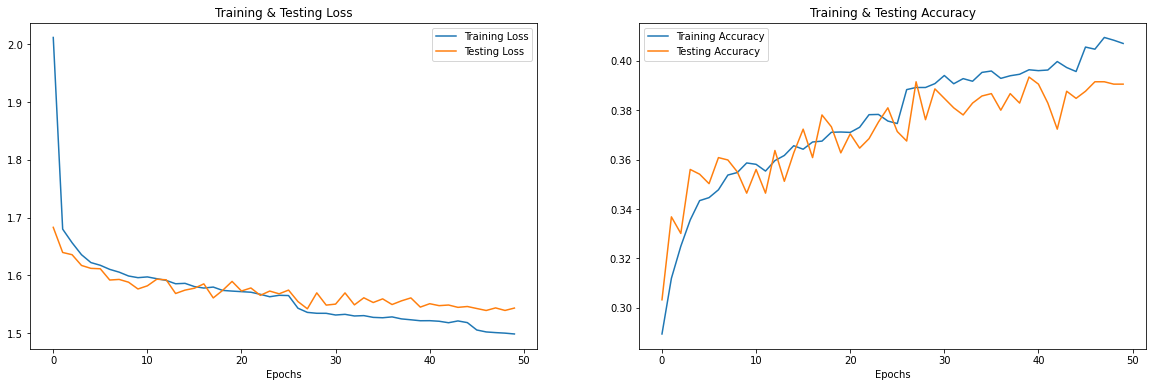

In [ ]:
print("Accuracy of model 1 on valid data : " , model1.evaluate(x_valid1,y_valid1)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
test_acc = history1.history['val_accuracy']
test_loss = history1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model1.predict(x_test1)
y_pred = encoder.inverse_transform(pred_test)

y_test11 = encoder.inverse_transform(y_test1)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test11.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,HAP,HAP
1,DIS,SAD
2,DIS,HAP
3,ANG,ANG
4,ANG,ANG
5,HAP,ANG
6,DIS,FEA
7,ANG,ANG
8,HAP,NEU
9,NEU,ANG


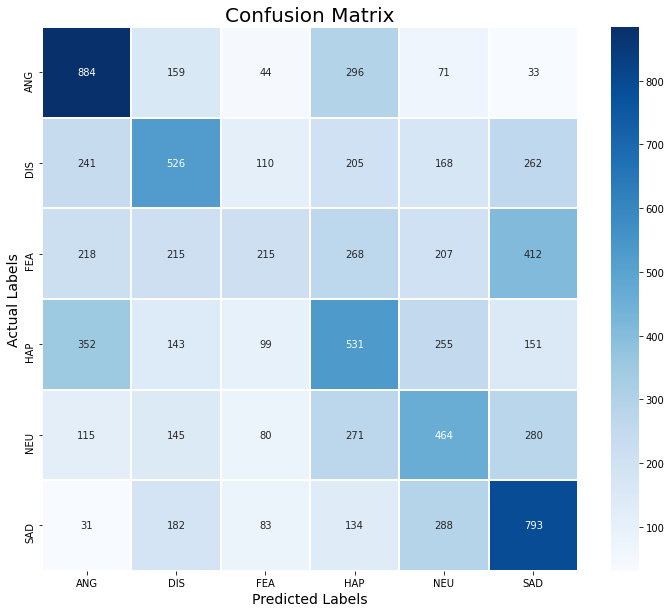

In [ ]:
cm = confusion_matrix(y_test11, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test11, y_pred))

              precision    recall  f1-score   support

         ANG       0.48      0.59      0.53      1487
         DIS       0.38      0.35      0.37      1512
         FEA       0.34      0.14      0.20      1535
         HAP       0.31      0.35      0.33      1531
         NEU       0.32      0.34      0.33      1355
         SAD       0.41      0.52      0.46      1511

    accuracy                           0.38      8931
   macro avg       0.37      0.38      0.37      8931
weighted avg       0.37      0.38      0.37      8931



In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(x_train1.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(6, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc", f1_m])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 196, 512)          3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 196, 512)          2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 512)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 512)           1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 512)           2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 512)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 49, 256)           6

In [ ]:
history = model.fit(x_train1, y_train1, validation_data=(x_valid1, y_valid1),
                    epochs=25, batch_size=64,
                    callbacks=[ learning_rate_reduction])

Epoch 1/25
310/310 [==============================] - 462s 1s/step - loss: 1.8218 - acc: 0.2871 - f1_m: 0.1258 - val_loss: 1.8548 - val_acc: 0.2726 - val_f1_m: 0.0465
Epoch 2/25
310/310 [==============================] - 457s 1s/step - loss: 1.6341 - acc: 0.3391 - f1_m: 0.1463 - val_loss: 2.2178 - val_acc: 0.1891 - val_f1_m: 0.1898
Epoch 3/25
310/310 [==============================] - 449s 1s/step - loss: 1.5793 - acc: 0.3594 - f1_m: 0.1620 - val_loss: 1.5879 - val_acc: 0.3359 - val_f1_m: 0.1044
Epoch 4/25
310/310 [==============================] - 446s 1s/step - loss: 1.5432 - acc: 0.3796 - f1_m: 0.1841 - val_loss: 1.5990 - val_acc: 0.3580 - val_f1_m: 0.1744
Epoch 5/25
310/310 [==============================] - 443s 1s/step - loss: 1.5140 - acc: 0.3930 - f1_m: 0.2101 - val_loss: 1.6235 - val_acc: 0.3589 - val_f1_m: 0.2478
Epoch 6/25
310/310 [==============================] - 423s 1s/step - loss: 1.4820 - acc: 0.4098 - f1_m: 0.2356 - val_loss: 1.5751 - val_acc: 0.3580 - val_f1_m: 0.180

33/33 [==============================] - 4s 113ms/step - loss: 2.4567 - acc: 0.4933 - f1_m: 0.4964
Accuracy of model 1 on test data :  49.328213930130005 %


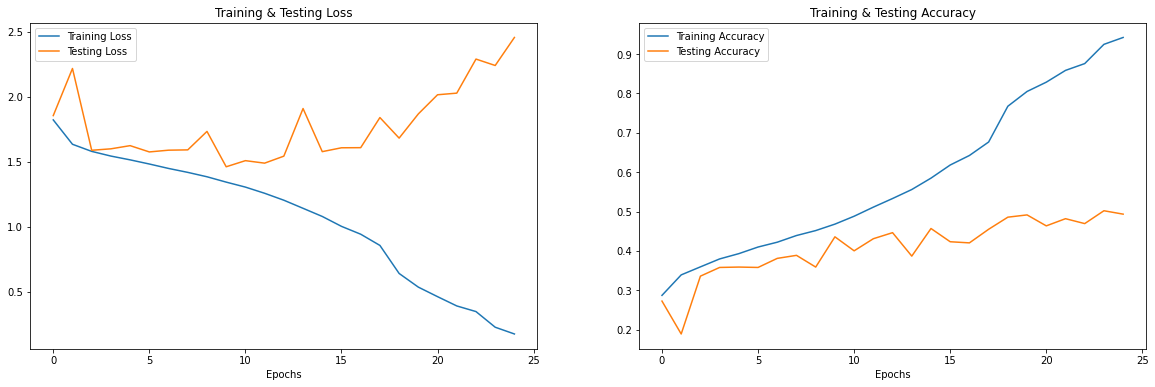

In [ ]:
print("Accuracy of model 1 on test data : " , model.evaluate(x_valid1,y_valid1)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test1)
y_pred = encoder.inverse_transform(pred_test)

y_test11 = encoder.inverse_transform(y_test1)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test11.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,HAP,HAP
1,FEA,SAD
2,DIS,HAP
3,ANG,ANG
4,ANG,ANG
5,HAP,ANG
6,DIS,FEA
7,ANG,ANG
8,NEU,NEU
9,SAD,ANG


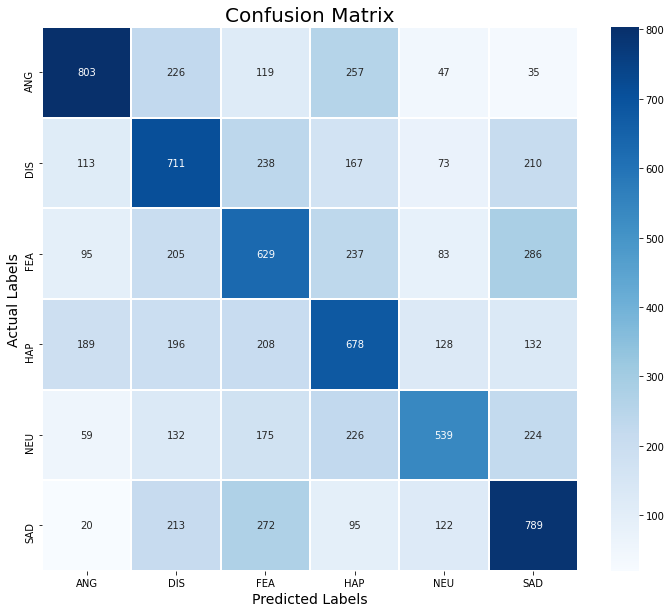

In [ ]:
cm = confusion_matrix(y_test11, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test11, y_pred))

              precision    recall  f1-score   support

         ANG       0.63      0.54      0.58      1487
         DIS       0.42      0.47      0.45      1512
         FEA       0.38      0.41      0.40      1535
         HAP       0.41      0.44      0.42      1531
         NEU       0.54      0.40      0.46      1355
         SAD       0.47      0.52      0.50      1511

    accuracy                           0.46      8931
   macro avg       0.48      0.46      0.47      8931
weighted avg       0.47      0.46      0.47      8931



**Model 2**

In [ ]:
x_train2 = x_train2.reshape(x_train2.shape[0], 157,128,1)
x_valid2 = x_valid2.reshape(x_valid2.shape[0],  157,128,1)
x_test2 = x_test2.reshape(x_test2.shape[0],  157,128,1)
x_train2.shape, y_train2.shape, x_valid2.shape, y_valid2.shape

((4948, 157, 128, 1), (4948, 6), (261, 157, 128, 1), (261, 6))

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3),strides=1, padding='same', activation='relu', input_shape=(157, 128, 1)))
#model2.add(layers.Conv2D(32, (3, 3), activation='relu',strides=1, padding='same'))
model2.add(layers.MaxPooling2D((2, 2),strides=2))

model2.add(layers.Conv2D(32, (3, 3), activation='relu',strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#model2.add(layers.Conv2D(64, (3, 3), activation='relu',strides=1, padding='same'))
model2.add(layers.MaxPooling2D((2, 2),strides=2))
model2.add(layers.Dropout(0.5))

model2.add(layers.Conv2D(16, (3, 3), activation='relu',strides=1, padding='same'))
#model2.add(layers.Conv2D(128, (3, 3), activation='relu',strides=1, padding='same'))
model2.add(layers.MaxPooling2D((2, 2),strides=2))

model2.add(layers.Flatten())
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dropout(0.25))

model2.add(layers.Dense(6, activation='softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 157, 128, 64)      640       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 78, 64, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 78, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 39, 32, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 39, 32, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 39, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 19, 16, 16)      

In [ ]:
from keras.callbacks import ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history2=model2.fit(x_train2, y_train2, batch_size=64, epochs=10, validation_data=(x_valid2, y_valid2), callbacks=[rlrp])

Epoch 1/10
78/78 [==============================] - 171s 2s/step - loss: 2.0182 - accuracy: 0.2326 - val_loss: 1.9121 - val_accuracy: 0.2797
Epoch 2/10
78/78 [==============================] - 168s 2s/step - loss: 1.7823 - accuracy: 0.2781 - val_loss: 1.9072 - val_accuracy: 0.3487
Epoch 3/10
78/78 [==============================] - 170s 2s/step - loss: 1.6637 - accuracy: 0.3082 - val_loss: 1.8501 - val_accuracy: 0.3372
Epoch 4/10
78/78 [==============================] - 167s 2s/step - loss: 1.6094 - accuracy: 0.3246 - val_loss: 1.9284 - val_accuracy: 0.3295
Epoch 5/10
78/78 [==============================] - 162s 2s/step - loss: 1.5790 - accuracy: 0.3367 - val_loss: 2.0207 - val_accuracy: 0.3870
Epoch 6/10
78/78 [==============================] - 163s 2s/step - loss: 1.5538 - accuracy: 0.3527 - val_loss: 3.1721 - val_accuracy: 0.3793
Epoch 7/10
78/78 [==============================] - 163s 2s/step - loss: 1.5257 - accuracy: 0.3682 - val_loss: 2.0777 - val_accuracy: 0.3870
Epoch 8/10
78

9/9 [==============================] - 2s 215ms/step - loss: 4.4529 - accuracy: 0.4023
Accuracy of model 2 on valid data :  40.229883790016174 %


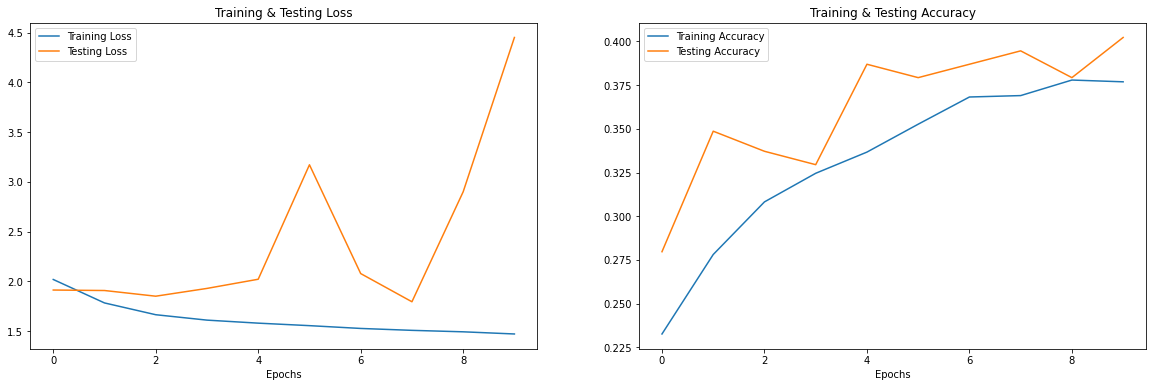

In [ ]:
print("Accuracy of model 2 on valid data : " , model2.evaluate(x_valid2,y_valid2)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
test_acc = history2.history['val_accuracy']
test_loss = history2.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model2.predict(x_test2)
y_pred = encoder.inverse_transform(pred_test)

y_test2 = encoder.inverse_transform(y_test2)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,SAD,NEU
1,SAD,NEU
2,DIS,DIS
3,NEU,HAP
4,DIS,DIS
5,ANG,HAP
6,FEA,FEA
7,DIS,HAP
8,ANG,DIS
9,SAD,SAD


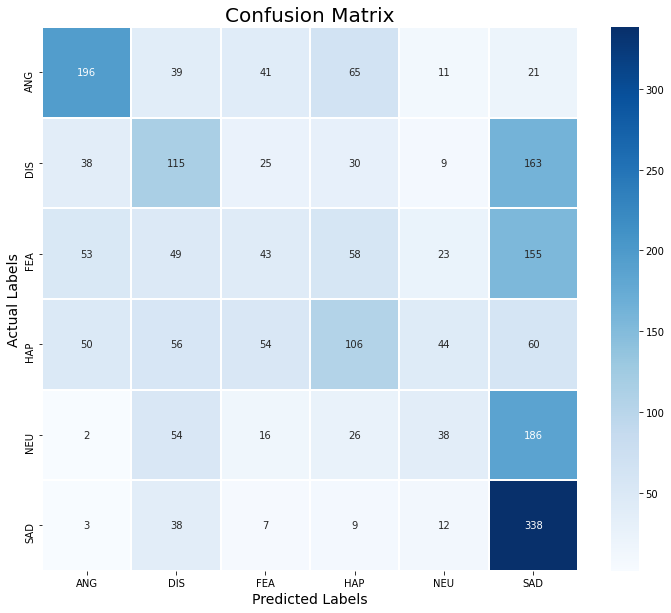

In [ ]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

         ANG       0.57      0.53      0.55       373
         DIS       0.33      0.30      0.31       380
         FEA       0.23      0.11      0.15       381
         HAP       0.36      0.29      0.32       370
         NEU       0.28      0.12      0.17       322
         SAD       0.37      0.83      0.51       407

    accuracy                           0.37      2233
   macro avg       0.36      0.36      0.33      2233
weighted avg       0.36      0.37      0.34      2233

